В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
import pandas as pd
cars_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cars.csv") # замініть на ваш шлях до файлу
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [ ]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [4]:
# Виводимо типи даних колонок
column_types = cars_df.dtypes
print(column_types)

# Досліджуємо типи даних у колонках типу 'object'
for column in cars_df.select_dtypes(include=['object']).columns:
    print(f"Column: {column}")
    print(cars_df[column].apply(type).value_counts())

# Виводимо кількість значень у кожній категоріальній колонці
for column in cars_df.select_dtypes(include=['object', 'category']).columns:
    print(f"Column: {column} - Unique values count: {cars_df[column].nunique()}")
    print(cars_df[column].value_counts())

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object
Column: Brand
Brand
<class 'str'>    100
Name: count, dtype: int64
Column: Model
Model
<class 'str'>    100
Name: count, dtype: int64
Column: Fuel_Type
Fuel_Type
<class 'str'>    100
Name: count, dtype: int64
Column: Transmission
Transmission
<class 'str'>    100
Name: count, dtype: int64
Column: Owner_Type
Owner_Type
<class 'str'>    100
Name: count, dtype: int64
Column: Brand - Unique values count: 11
Brand
Ford          11
Hyundai       11
Tata          11
Toyota        10
Volkswagen    10
Audi          10
BMW           10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: count, dtype: in

**Числові колонки:**

Car_ID (int64);
Year (int64);
Kilometers_Driven (int64);
Mileage (int64);
Engine (int64);
Power (int64);
Seats (int64);
Price (int64);

**Категоріальні колонки:**

**Бінарні:**
Fuel_Type (2 значення: Petrol, Diesel);
Transmission (2 значення: Automatic, Manual);

**Мультикатегоріальні без порядку:**
Brand (11 значень);
Model (58 значень);

**Мультикатегоріальні з порядком:**
Owner_Type (3 значення: First, Second, Third)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Припустимо, cars_df - це наш DataFrame
# cars_df = pd.read_csv('path_to_file.csv')

# Розділимо дані на вхідні ознаки (X) та цільову змінну (y)
X = cars_df.drop(columns=['Price'])
y = cars_df['Price']

# Розділимо на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Визначимо числові та категоріальні колонки
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Побудуємо трансформер для попередньої обробки даних
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Створимо пайплайн, який включає попередню обробку та модель
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Навчимо модель на тренувальних даних
pipeline.fit(X_train, y_train)

# Використаємо модель для передбачень на тестових даних
y_pred = pipeline.predict(X_test)

# Перетворимо тестові дані для подальшого використання
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

# Тренувальні дані також перетворимо для порівняння (необов'язково)
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)

# В результаті у нас є 4 набори даних:
# X_train, X_test, y_train, y_test - оригінальні дані
# X_train_transformed, X_test_transformed - перетворені дані для моделі (опціонально)

print("Тренувальні дані (оригінальні):", X_train.shape)
print("Тестові дані (оригінальні):", X_test.shape)
print("Цільова змінна (тренувальні дані):", y_train.shape)
print("Цільова змінна (тестові дані):", y_test.shape)

Тренувальні дані (оригінальні): (80, 12)
Тестові дані (оригінальні): (20, 12)
Цільова змінна (тренувальні дані): (80,)
Цільова змінна (тестові дані): (20,)


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Розділимо дані на вхідні ознаки (X) та цільову змінну (y)
X = cars_df.drop(columns=['Price'])
y = cars_df['Price']

# Розділимо на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Кодуємо бінарні колонки
X_train['Fuel_Type'] = (X_train['Fuel_Type'] == X_train['Fuel_Type'].mode()[0]).astype(int)
X_test['Fuel_Type'] = (X_test['Fuel_Type'] == X_train['Fuel_Type'].mode()[0]).astype(int)

X_train['Transmission'] = (X_train['Transmission'] == X_train['Transmission'].mode()[0]).astype(int)
X_test['Transmission'] = (X_test['Transmission'] == X_train['Transmission'].mode()[0]).astype(int)

# Кодуємо колонку Brand з використанням OneHotEncoder
brand_encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity
X_train_brand = brand_encoder.fit_transform(X_train[['Brand']])
X_test_brand = brand_encoder.transform(X_test[['Brand']])

# Перетворюємо закодовані значення на DataFrame і додаємо до X_train та X_test
X_train_brand_df = pd.DataFrame(X_train_brand, columns=brand_encoder.get_feature_names_out(['Brand']), index=X_train.index)
X_test_brand_df = pd.DataFrame(X_test_brand, columns=brand_encoder.get_feature_names_out(['Brand']), index=X_test.index)

# Додаємо закодовані значення колонок
X_train = X_train.drop(columns=['Brand'])
X_test = X_test.drop(columns=['Brand'])

X_train = pd.concat([X_train, X_train_brand_df], axis=1)
X_test = pd.concat([X_test, X_test_brand_df], axis=1)

# Кодування колонки Owner_Type з використанням OrdinalEncoder
owner_encoder = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
X_train['Owner_Type'] = owner_encoder.fit_transform(X_train[['Owner_Type']])
X_test['Owner_Type'] = owner_encoder.transform(X_test[['Owner_Type']])

pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen
83,84,T-Roc,2019,22000,1,1,1.0,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,A5,2018,28000,0,1,0.0,17,1968,187,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,A6,2018,28000,1,1,0.0,15,1984,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Vento,2017,32000,1,0,1.0,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,GLC,2017,26000,1,1,1.0,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen
17,18,Q3,2016,38000,0,0,1.0,15,1395,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Santro,2019,26000,0,0,2.0,20,1086,68,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Vento,2017,32000,0,0,1.0,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Ertiga,2020,18000,0,0,0.0,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Aspire,2019,26000,0,0,2.0,20,1194,94,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(None, None)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])


Очікуваний результат після трансформацій:

In [ ]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

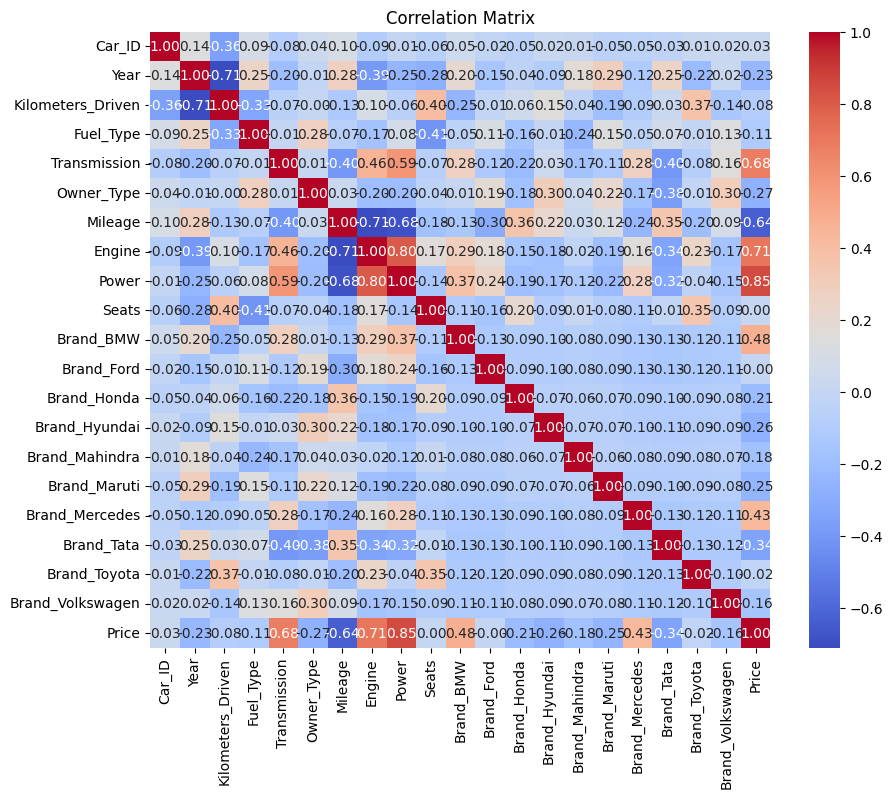

Колонки, що корелюють з цільовою змінною на більш ніж 0.5 за модулем:
['Transmission', 'Mileage', 'Engine', 'Power']


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Оберемо лише числові колонки з X_train
numeric_columns = X_train.select_dtypes(include=[np.number]).columns

# Об'єднаємо числові колонки з y_train
numeric_data = pd.concat([X_train[numeric_columns], y_train], axis=1)

# Побудуємо матрицю кореляції
correlation_matrix = numeric_data.corr()

# Побудуємо теплокарту кореляційної матриці
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Знайдемо колонки, що корелюють з цільовою змінною на більш ніж 0.5 за модулем
high_correlation_features = correlation_matrix[np.abs(correlation_matrix['Price']) > 0.5].index.tolist()
high_correlation_features.remove('Price')  # Видаляємо цільову змінну

print("Колонки, що корелюють з цільовою змінною на більш ніж 0.5 за модулем:")
print(high_correlation_features)

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

Root Mean Squared Error для тренувального набору: 210293.57828151857
Root Mean Squared Error для тестового набору: 330119.0001335198


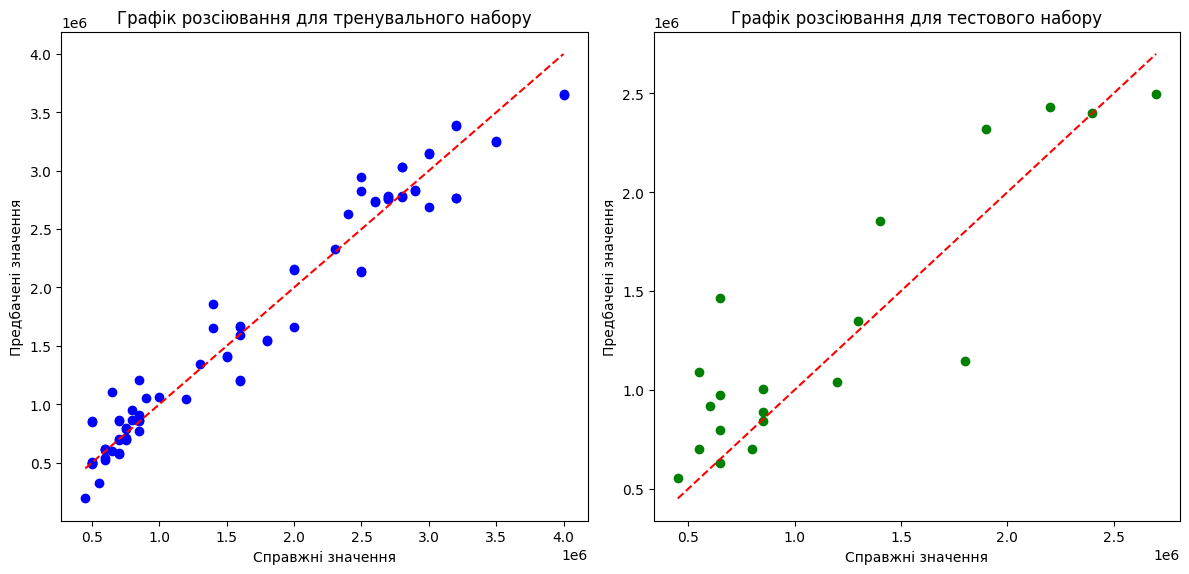

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Видалимо НЕчислові колонки з X_train і X_test
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Тренуємо лінійну регресію на числових даних тренувального набору X_train
linear_reg = LinearRegression()
linear_reg.fit(X_train_numeric, y_train)

# Зробимо передбачення на тренувальних і тестових даних
y_train_pred = linear_reg.predict(X_train_numeric)
y_test_pred = linear_reg.predict(X_test_numeric)

# Обчислимо root mean squared error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Root Mean Squared Error для тренувального набору:", rmse_train)
print("Root Mean Squared Error для тестового набору:", rmse_test)

# Побудуємо графік розсіювання передбачень проти реальних даних цільової змінної
plt.figure(figsize=(12, 6))

# Графік для тренувального набору даних
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')
plt.title('Графік розсіювання для тренувального набору')
plt.xlabel('Справжні значення')
plt.ylabel('Предбачені значення')

# Графік для тестового набору даних
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Графік розсіювання для тестового набору')
plt.xlabel('Справжні значення')
plt.ylabel('Предбачені значення')

plt.tight_layout()
plt.show()

Отримані значення Root Mean Squared Error (RMSE) для тренувального набору (210,293.58) та тестового набору (330,119.00) досить великі. Це означає, що модель лінійної регресії, натренована на числових даних, не дуже добре передбачає цільову змінну, оскільки вона робить значні помилки у прогнозуванні. Такі великі значення RMSE можуть свідчити про недостатню адаптацію моделі до даних або можуть бути наслідком великої дисперсії у цільовій змінній або недостатньої кількості змінних для врахування впливу на цільову змінну. Плюс кількість даних на тестовому наборі має значні відмінності від тренувального.

Отже, можна зробити висновок, що модель потребує подальшої оптимізації або використання складніших алгоритмів для досягнення кращої точності прогнозування.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [18]:
from sklearn.preprocessing import StandardScaler

# Масштабуємо дані
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Тренуємо модель на відмасштабованих даних
linear_reg_scaled = LinearRegression()
linear_reg_scaled.fit(X_train_scaled, y_train)

# Виведемо коефіцієнти моделі
coefficients = pd.DataFrame(linear_reg_scaled.coef_, index=X_train_numeric.columns, columns=['Coefficient'])
print("Коефіцієнти моделі після масштабування:")
print(coefficients)

# Знайдемо найвпливовіші колонки за значенням коефіцієнтів
most_influential_features = coefficients.abs().sort_values(by='Coefficient', ascending=False).index.tolist()

print("\nНайвпливовіші колонки:")
print(most_influential_features)

Коефіцієнти моделі після масштабування:
                     Coefficient
Car_ID               5608.685421
Year                -8765.645714
Kilometers_Driven  -94398.721486
Fuel_Type         -183848.018909
Transmission       116693.768206
Owner_Type          42344.952815
Mileage           -131715.512030
Engine             -21377.453338
Power              496769.214899
Seats               -2148.924549
Brand_BMW           -8144.891028
Brand_Ford        -334761.655121
Brand_Honda       -228645.911279
Brand_Hyundai     -332815.861280
Brand_Mahindra    -290310.207388
Brand_Maruti      -278152.872913
Brand_Mercedes      -6503.423663
Brand_Tata        -292649.105520
Brand_Toyota      -189794.446257
Brand_Volkswagen  -286620.547297

Найвпливовіші колонки:
['Power', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Tata', 'Brand_Mahindra', 'Brand_Volkswagen', 'Brand_Maruti', 'Brand_Honda', 'Brand_Toyota', 'Fuel_Type', 'Mileage', 'Transmission', 'Kilometers_Driven', 'Owner_Type', 'Engine', 'Year', 'Brand_BMW

Поглянувши на коефіцієнти моделі, можемо зробити такі висновки:

**Power** - коефіцієнт дуже великий і позитивний, що означає, що збільшення потужності двигуна призведе до збільшення ціни автомобіля. Це логічно, оскільки зазвичай автомобілі з більшою потужністю мають вищу ціну.

**Brand_Ford, Brand_Hyundai, Brand_Tata, Brand_Mahindra, Brand_Volkswagen, Brand_Maruti, Brand_Honda, Brand_Toyota, Brand_Mercedes, Brand_BMW** - коефіцієнти для категорій марок автомобілів також мають значну вагу. Зазвичай кожна марка має свою унікальну цінову стратегію, тому вплив цих змінних на ціну автомобіля є логічним.

**Fuel_Type** - великий від'ємний коефіцієнт для типу палива також може бути логічним, оскільки ціна автомобіля може зменшуватися для автомобілів з більш витратними видами палива.

**Mileage** - великий від'ємний коефіцієнт для пробігу на літр пального також має сенс, оскільки автомобілі з вищим пробігом можуть коштувати менше.

**Transmission** - позитивний коефіцієнт для типу трансмісії може вказувати на те, що автомобілі з автоматичною трансмісією можуть бути дорожчими.

**Kilometers_Driven** - від'ємний коефіцієнт для пробігу автомобіля також є логічним, оскільки автомобілі з меншим пробігом зазвичай мають вищу ціну.

**Owner_Type, Engine, Year, Seats, Car_ID** - ці змінні також мають певний вплив на ціну автомобіля, але їх вага може бути меншою порівняно з іншими факторами.

Отже, взагалі коефіцієнти моделі мають логічний напрям дії, відповідний значенням відповідних змінних, і вони впливають на цільову змінну в очікуваному напрямі збільшення або зменшення.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [67]:
import statsmodels.api as sm
import numpy as np

# Додаємо стовпець з константою
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Натренуємо модель
model = sm.OLS(y_train, X_train_scaled_const)
results = model.fit()

# Виведемо звіт
print(results.summary())

# Визначимо статистично значущі ознаки
significant_features = results.pvalues[results.pvalues < 0.05].index.tolist()
print("\nСтатистично значущі ознаки:")
print(significant_features)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Tue, 28 May 2024   Prob (F-statistic):           2.01e-33
Time:                        22:02:33   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   2.74e+04     61.363      0.0

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [72]:
# Вибір статистично значущих ознак
significant_features = results.pvalues[1:] < 0.05
significant_features_names = X_train.columns[1:][significant_features].tolist()

# Вивід статистично значущих ознак
print("\nСтатистично значущі ознаки:")
print(significant_features_names)

# Обираємо лише статистично значущі ознаки
X_train_significant = X_train_scaled_const[:, 1:][:, significant_features]

# Натренуємо модель
model_significant = sm.OLS(y_train, X_train_significant)
results_significant = model_significant.fit()

# Виведемо звіт
print(results_significant.summary())


Статистично значущі ознаки:
['Fuel_Type', 'Transmission', 'Mileage', 'Power', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen']
                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.262
Model:                            OLS   Adj. R-squared (uncentered):              0.132
Method:                 Least Squares   F-statistic:                              2.013
Date:                Tue, 28 May 2024   Prob (F-statistic):                      0.0362
Time:                        22:09:07   Log-Likelihood:                         -1260.9
No. Observations:                  80   AIC:                                      2546.
Df Residuals:                      68   BIC:                                      2574.
Df Model:                          12                                                  

Оригінальна модель має значно кращі показники R-squared і Adj. R-squared порівняно з моделлю, яка використовує лише статистично значущі ознаки.
Модель зі статистично значущими ознаками виявляється менш ефективною у поясненні варіації залежної змінної, оскільки значення R-squared і Adj. R-squared значно нижчі.
Отже, в контексті збереження якості пояснення залежної змінної, перевага надається оригінальній моделі з усіма ознаками.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [73]:
import statsmodels.api as sm

# Додаємо стовпець з константою
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Натренуємо модель з усіма ознаками, де p-value менше 0.25
significant_features = results.pvalues[1:] < 0.25
X_train_sig_025 = X_train_scaled_const[:, 1:][:, significant_features]

# Натренуємо модель
model_sig_025 = sm.OLS(y_train, X_train_sig_025)
results_sig_025 = model_sig_025.fit()

# Виведемо звіт
print(results_sig_025.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.263
Model:                            OLS   Adj. R-squared (uncentered):              0.120
Method:                 Least Squares   F-statistic:                              1.840
Date:                Tue, 28 May 2024   Prob (F-statistic):                      0.0544
Time:                        22:10:15   Log-Likelihood:                         -1260.9
No. Observations:                  80   AIC:                                      2548.
Df Residuals:                      67   BIC:                                      2579.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R-squared вказує на те, що приблизно 26.3% варіації залежної змінної можна пояснити моделлю.
Adj. R-squared, у порівнянні з R-squared, зменшується, оскільки він враховує кількість ознак та спробує уникнути перенавчання. Значення Adj. R-squared менше за R-squared, що може вказувати на те, що додавання нових ознак не допомогло покращити модель.
Отже, в цьому випадку, модель, яка використовує лише статистично значущі ознаки (p-value < 0.25), має значно гірші показники якості порівняно з оригінальною моделлю.